## LAB 6 

Objective:
* To apply n-step Temporal Difference Learning in a robot rescue mission, where a robot navigates a maze like grid environment

Problem statement 
* Design and train a reinforcement learning agent using n-step bootstrapping to simulate a rescue robot 
navigating a grid environment. 
* The robot should learn an optimal policy to : 
Reach survivors efficiently, Avoid traps and Minimize movement cost in a dynamic, partially hostile 
environment. 

### CODE

MovieWriter ffmpeg unavailable; using Pillow instead.


✅ Training complete.


ValueError: unknown file extension: .mp4

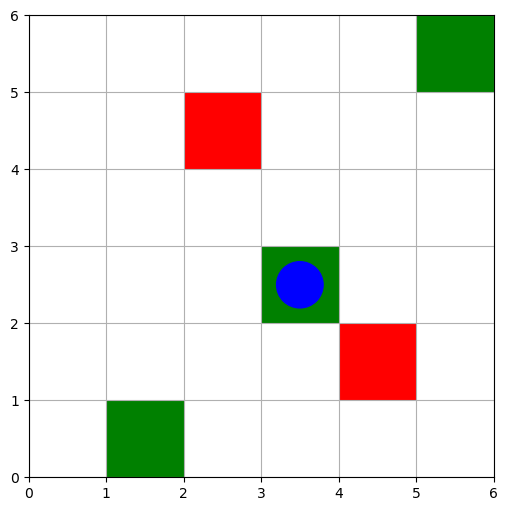

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from collections import deque
import random

# ====== Parameters ======
GRID_SIZE = 6
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_MAP = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}
n_steps = 3
gamma = 0.9
alpha = 0.1
epsilon = 0.2
episodes = 3000
max_steps = 50

SURVIVORS = [(0, 5), (3, 3), (5, 1)]
TRAPS = [(1, 2), (4, 4)]

GOAL_REWARD = 10
TRAP_PENALTY = -10
STEP_COST = -1

Q = {}  # Q-table


# ====== Environment Functions ======

def init_state():
    """Initialize robot in a random position not in survivors or traps."""
    while True:
        s = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
        if s not in SURVIVORS and s not in TRAPS:
            return s


def get_valid_actions(pos):
    """Get valid actions within grid boundaries."""
    valid = []
    for a, (dx, dy) in ACTION_MAP.items():
        nx, ny = pos[0] + dx, pos[1] + dy
        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
            valid.append(a)
    return valid


def select_action(state):
    """Epsilon-greedy policy for action selection."""
    valid_actions = get_valid_actions(state)
    if state not in Q:
        Q[state] = {a: 0 for a in valid_actions}
    else:
        for a in valid_actions:
            if a not in Q[state]:
                Q[state][a] = 0

    if not valid_actions:
        return random.choice(ACTIONS)

    if np.random.rand() < epsilon:
        return random.choice(valid_actions)

    return max(Q[state], key=Q[state].get)


def step(state, action):
    """Take a step and return the next state and reward."""
    dx, dy = ACTION_MAP[action]
    next_state = (state[0] + dx, state[1] + dy)
    reward = STEP_COST
    if next_state in SURVIVORS:
        reward += GOAL_REWARD
    elif next_state in TRAPS:
        reward += TRAP_PENALTY
    return next_state, reward


# ====== Training Phase ======
for ep in range(episodes):
    state = init_state()
    if state not in Q:
        Q[state] = {a: 0 for a in get_valid_actions(state)}

    trajectory = deque()

    for step_i in range(max_steps):
        action = select_action(state)
        next_state, reward = step(state, action)

        trajectory.append((state, action, reward))

        if len(trajectory) >= n_steps:
            G = sum([trajectory[i][2] * (gamma ** i) for i in range(n_steps)])
            s0, a0, _ = trajectory.popleft()
            if next_state not in Q:
                Q[next_state] = {a: 0 for a in get_valid_actions(next_state)}
            G += (gamma ** n_steps) * max(Q[next_state].values())
            Q[s0][a0] += alpha * (G - Q[s0][a0])

        state = next_state

    # Handle remaining trajectory after episode ends
    while trajectory:
        G = sum([trajectory[i][2] * (gamma ** i) for i in range(len(trajectory))])
        s0, a0, _ = trajectory.popleft()
        if s0 not in Q:
            Q[s0] = {a: 0 for a in get_valid_actions(s0)}
        Q[s0][a0] += alpha * (G - Q[s0][a0])

print("✅ Training complete.")


# ====== Simulation for Visualization ======

state = init_state()
steps = [state]
for _ in range(20):
    action = select_action(state)
    state, _ = step(state, action)
    steps.append(state)


# ====== Animation Code ======

fig, ax = plt.subplots(figsize=(6, 6))
robot_patch = patches.Circle((0.5, 0.5), 0.3, color='blue')


def init():
    ax.clear()
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks(np.arange(GRID_SIZE + 1))
    ax.set_yticks(np.arange(GRID_SIZE + 1))
    ax.grid(True)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cell = (i, j)
            color = 'white'
            if cell in TRAPS:
                color = 'red'
            elif cell in SURVIVORS:
                color = 'green'
            rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, facecolor=color)
            ax.add_patch(rect)

    return []


def update(frame):
    init()
    rx, ry = steps[frame]
    robot_patch.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
    ax.add_patch(robot_patch)
    return [robot_patch]


anim = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True)

# Save the animation (optional)
anim.save("rescue_robot_animation.mp4", writer="ffmpeg", fps=2)

# To display in Jupyter Notebooks:
# from IPython.display import HTML
# HTML(anim.to_jshtml())


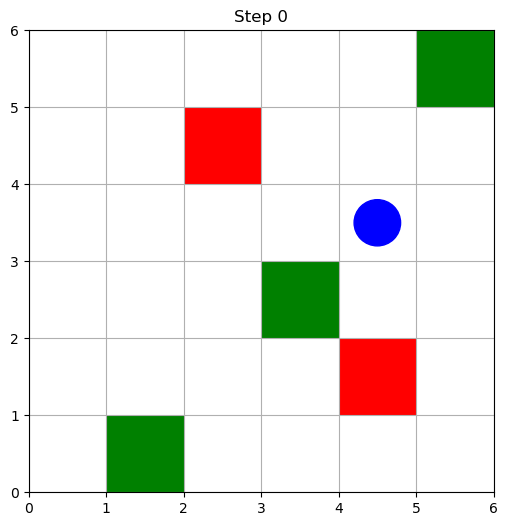

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

def show_steps(steps):
    fig, ax = plt.subplots(figsize=(6, 6))
    robot_patch = patches.Circle((0.5, 0.5), 0.3, color='blue')

    def draw_grid():
        ax.clear()
        ax.set_xlim(0, GRID_SIZE)
        ax.set_ylim(0, GRID_SIZE)
        ax.set_xticks(range(GRID_SIZE + 1))
        ax.set_yticks(range(GRID_SIZE + 1))
        ax.grid(True)
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                cell = (i, j)
                color = 'white'
                if cell in TRAPS:
                    color = 'red'
                elif cell in SURVIVORS:
                    color = 'green'
                rect = patches.Rectangle((j, GRID_SIZE - i - 1), 1, 1, facecolor=color)
                ax.add_patch(rect)

    for step_num, (rx, ry) in enumerate(steps):
        draw_grid()
        robot_patch.center = (ry + 0.5, GRID_SIZE - rx - 0.5)
        ax.add_patch(robot_patch)
        ax.set_title(f"Step {step_num}")
        plt.pause(0.5)  # pause to show frame for half a second
        plt.draw()
    
    plt.show()

# Call this function with your steps list
show_steps(steps)
